#  A CENSUS PROJECT

# Importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv

In [2]:
# loading the data set from pandas

In [3]:
p_census = pd.read_csv("census_07_2022.csv")

In [4]:
p_census


,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Forgotten Gardens,Laura,White,56,Head,Married,Female,Unemployed,None,Christian
1,1,1,Forgotten Gardens,Elliot,White,57,Husband,Married,Male,"Education officer, community",None,Christian
2,2,1,Forgotten Gardens,Nicole,White,15,Daughter,NaN,Female,Student,None,NaN
3,3,2,Forgotten Gardens,Michelle,John,44,Head,Divorced,Female,"Administrator, arts",None,Christian
4,4,2,Forgotten Gardens,Jeffrey,John,9,Son,NaN,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7768,7768,1,Fletcher Farmhouse,Beverley,Hudson,30,Head,Divorced,Female,"Research officer, trade union",None,Christian
7769,7769,1,Fletcher Farmhouse,Rachael,Hudson,0,Daughter,NaN,Female,Child,None,NaN
7770,7770,1,Fletcher Farmhouse,Stephen,Shepherd,54,Sibling,Divorced,Male,"Accountant, chartered public finance",None,None
7771,7771,1,Fletcher Farmhouse,William,French,48,Lodger,Single,Male,Unemployed,None,Christian


# Exploring the data

In [5]:
# There is an unnamed column in the data set, we have to drop it

In [6]:
p_census.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
p_census

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Forgotten Gardens,Laura,White,56,Head,Married,Female,Unemployed,None,Christian
1,1,Forgotten Gardens,Elliot,White,57,Husband,Married,Male,"Education officer, community",None,Christian
2,1,Forgotten Gardens,Nicole,White,15,Daughter,NaN,Female,Student,None,NaN
3,2,Forgotten Gardens,Michelle,John,44,Head,Divorced,Female,"Administrator, arts",None,Christian
4,2,Forgotten Gardens,Jeffrey,John,9,Son,NaN,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7768,1,Fletcher Farmhouse,Beverley,Hudson,30,Head,Divorced,Female,"Research officer, trade union",None,Christian
7769,1,Fletcher Farmhouse,Rachael,Hudson,0,Daughter,NaN,Female,Child,None,NaN
7770,1,Fletcher Farmhouse,Stephen,Shepherd,54,Sibling,Divorced,Male,"Accountant, chartered public finance",None,None
7771,1,Fletcher Farmhouse,William,French,48,Lodger,Single,Male,Unemployed,None,Christian


# checking the dimension of the data now

In [8]:
p_census.shape

(7773, 11)

In [9]:
#### Describing the data

In [10]:
p_census.describe().T

,count,unique,top,freq
House Number,7773,222,1,301
Street,7773,105,Wong Light,701
First Name,7773,366,James,36
Surname,7773,630,Smith,225
Age,7773,110,43,146
Relationship to Head of House,7773,21,Head,2912
Marital Status,5960,9,Single,2660
Gender,7773,9,Female,3889
Occupation,7773,1086,Student,1477
Infirmity,7773,8,None,7721


# Exploring the data for cleaning

In [11]:
p_census.info() # checking comprehensive information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7773 entries, 0 to 7772
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7773 non-null   object
 1   Street                         7773 non-null   object
 2   First Name                     7773 non-null   object
 3   Surname                        7773 non-null   object
 4   Age                            7773 non-null   object
 5   Relationship to Head of House  7773 non-null   object
 6   Marital Status                 5960 non-null   object
 7   Gender                         7773 non-null   object
 8   Occupation                     7773 non-null   object
 9   Infirmity                      7773 non-null   object
 10  Religion                       5910 non-null   object
dtypes: object(11)
memory usage: 668.1+ KB


#####    After having a look of the information about the census dataset,i  discovered that, all columns  have a datatype to be an 'object',   including those meant to be integers e.g House number and age .I also discovered that the Marital Status column and the Religion column also have null values 

In [12]:
#### checking the null values

In [13]:
p_census.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1813
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         1863
dtype: int64

In [14]:
occupation_unique = p_census["Occupation"].unique()
print(occupation_unique)

['Unemployed' 'Education officer, community' 'Student' ...
 'Retired Civil Service administrator'
 'Retired Research officer, government'
 'Retired Consulting civil engineer']


In [15]:
# using unique values to find all the unusual entries in the data set

In [16]:
age_unique = p_census["Age"].unique()
print(age_unique)

['56' '57' '15' '44' '9' '72' '38' '5' '3' '41' '13' '73' '45' '36' '51'
 '23' '33' '4' '0' '30' '6' '2' '21' '28' '27' '83' '85' '19' '40' '16'
 '89' '65' '47' '20' '68' '66' '37' '32' '14' '10' '86' '69' '58' '22'
 '59' '63' '46' '39' '53' '42' '12' '8' '1' '24' '50' '26' '70' '54' '43'
 '60' '18' '11' '29' '76' '64' '34' '52' '35' '7' '48' '25' '75' '79' '71'
 '17' '49' '55' '74' '78' '31' '62' '67' '61' '72.38784457' '74.38784457'
 '84' '88' '80' '77' '81' '87' '101' '104' '82' '91' '102' '97' '90' '96'
 '98' '93' '103' '80.57582061' '77.57582061' '7.11E-15' '92' '105' '94'
 ' ' '99']


##### upon further analysis in the age column using unique values, i discovered that, there's one missing value in the dataset and some ages in the data set were floats instead of integer

In [17]:
housenumber_unique = p_census["House Number"].unique()
print(housenumber_unique)

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71' '72'
 '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86'
 '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99' '100'
 '101' 'One' '102' '103' '104' '105' '106' '107' '108' '109' '110' '111'
 '112' '113' '114' '115' '116' '117' '118' '119' '120' '121' '122' '123'
 '124' '125' '126' '127' '128' '129' '130' '131' '132' '133' '134' '135'
 '136' '137' '138' '139' '140' '141' '142' '143' '144' '145' '146' '147'
 '148' '149' '150' '151' '152' '153' '154' '155' '156' '157' '158' '159'
 '160' '161' '162' '163' '164' '165' '166' '167' '168' '169' '170' '171'
 '172' '173' '174' '175' '176' '177' '178' '179' '180' '181' '1

#### upon further analysis, i found out that one of the house numbers , 'one' has it numbers to be words instead of number and all the values are in strings or objects 

In [18]:
unique_R_t_head = p_census["Relationship to Head of House"].unique()
print(unique_R_t_head)

['Head' 'Husband' 'Daughter' 'Son' 'None' 'Wife' 'Partner' 'Lodger'
 'Sibling' 'Visitor' 'Cousin' 'Adopted Son' 'Granddaughter' 'Grandson'
 'Adopted Daughter' 'Step-Son' 'Step-Daughter' 'Neice' 'Nephew'
 'Adopted Granddaughter' ' ']


In [19]:
p_census['Relationship to Head of House'].value_counts()

Head                     2912
Son                      1273
Daughter                 1215
Husband                   803
None                      474
Wife                      291
Lodger                    274
Partner                   223
Grandson                   66
Granddaughter              56
Sibling                    42
Cousin                     32
Visitor                    27
Step-Son                   24
Adopted Son                17
Step-Daughter              16
Neice                      10
Nephew                      9
Adopted Daughter            7
Adopted Granddaughter       1
                            1
Name: Relationship to Head of House, dtype: int64

#### The data set of Relationship to Head of House shows me that there's no missing value. After i did further analysis, i realised there's one (1) empty string using value count and neice is wrongly spelt

In [20]:
p_census['Marital Status'].value_counts()

Single      2660
Married     2193
Divorced     695
Widowed      395
D              7
W              5
M              3
               1
S              1
Name: Marital Status, dtype: int64

##### After checking the marital status, i found out that , theres one missing value in the data set and also, i discovered that some of the main values like single, Married, Divorced, widowed where represented by S,M,D,W resepectively

In [21]:
p_census['Gender'].value_counts()

Female    3889
Male      3566
female     100
M           82
m           81
male        27
F           16
f           11
             1
Name: Gender, dtype: int64

##### After checking the Gender, i found out that , theres one missing value in the data set and also, i discovered that some of the main values like Female, Male, female, male where represented by F,M,f,m resepectively, just like marital status

In [22]:
p_census['Occupation'].value_counts()

Student                                    1477
University Student                          488
Unemployed                                  481
Child                                       433
PhD Student                                  14
                                           ... 
Retired Administrator, local government       1
Retired Engineer, communications              1
Retired Nurse, adult                          1
Retired Music therapist                       1
Retired Consulting civil engineer             1
Name: Occupation, Length: 1086, dtype: int64

print(list(set(p_census['Occupation'].tolist())))

#### After explorring of the Occupation column, the following was discovered
######    1. Some of the people that aren't retired added extra information to their job role. e.g instead of 'Engineer', we have 'Engineer, Manucfacturer',
######    2. Although a lot of people are retired, they seem to also add the job role they retired in


In [23]:
infirmity_unique = p_census["Infirmity"].unique()
print(infirmity_unique)

['None' 'Unknown Infection' 'Blind' 'Disabled' ' ' 'Mental Disability'
 'Physical Disability' 'Deaf']


#### After exploring the infirmity column, i discovered that there was one missing value

In [24]:
religionunique = p_census["Religion"].unique()
print(religionunique)

['Christian' nan 'None' 'Catholic' 'Methodist' 'Muslim' 'Jewish' 'Sikh'
 'Buddist' 'Bahai' 'Sith' 'Private' 'Baptist' ' ' 'Orthodoxy']


<AxesSubplot: >

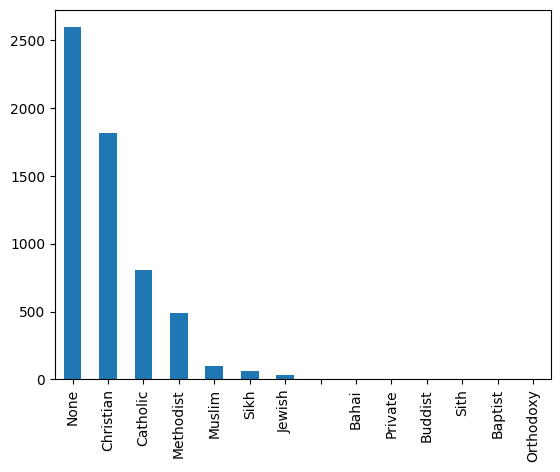

In [25]:
p_census['Religion'].value_counts().plot(kind='bar')

######  As i analysed  the Religion column, i found out that one of the values doesn't correspond to the term Religion like private . I also discovered a missing value in the dataset 

# CLEANING THE DATA

#####   First House Number

In [26]:
def hnum_string(column: list):
    for i, row in enumerate(column):
        if row == 'One':
            column[i] = 1
        else:
            column[i] = int(row)
    
    return column
            
p_census['House Number'] = hnum_string(p_census['House Number'].tolist())

In [27]:
p_census['House Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

###### All values in the House Number column as string  were converted to integers first. 
###### Before the conversion, a value idenfied as "one" was converted back to it's integer format by using replace method

In [28]:
                 
    # we can observe that the house number column has been replaced by integer 
p_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7773 entries, 0 to 7772
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7773 non-null   int64 
 1   Street                         7773 non-null   object
 2   First Name                     7773 non-null   object
 3   Surname                        7773 non-null   object
 4   Age                            7773 non-null   object
 5   Relationship to Head of House  7773 non-null   object
 6   Marital Status                 5960 non-null   object
 7   Gender                         7773 non-null   object
 8   Occupation                     7773 non-null   object
 9   Infirmity                      7773 non-null   object
 10  Religion                       5910 non-null   object
dtypes: int64(1), object(10)
memory usage: 668.1+ KB


### Handling Age

In [29]:
p_census["Age"].replace(to_replace = ["7.11E-15"], value = 0, inplace = True)# replace "7.11E-15" to zero

In [30]:
p_census[5998:5999]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5998,40,Skylock Curve,Jodie,Clarke,,Daughter,NaN,Female,Child,None,NaN


In [31]:
# Getting a dataframe of all students
children = p_census[p_census['Occupation']=='Child']
children_age = [i for i in children['Age']]

In [32]:

print(len(children_age))
children_age.remove(' ')  
print(len(children_age)) 

433
432


In [33]:
#From this evaluation, the most frequent age of child is 3, so we'll be assigning an age of 3 to jodie clarke
from collections import Counter
def find_mode(ages):
    ages = [int(i) for i in ages]
    return Counter(ages)

find_mode(children_age)

Counter({3: 104, 4: 98, 0: 59, 2: 90, 1: 81})

In [34]:
def change_age_string(column: list):
    for i, row in enumerate(column):
        if row == ' ':
            column[i] = 3
        else:
            column[i] = int(float(row))
    return column

In [35]:
p_census['Age'] = change_age_string(p_census['Age'].tolist())

In [36]:
p_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7773 entries, 0 to 7772
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7773 non-null   int64 
 1   Street                         7773 non-null   object
 2   First Name                     7773 non-null   object
 3   Surname                        7773 non-null   object
 4   Age                            7773 non-null   int64 
 5   Relationship to Head of House  7773 non-null   object
 6   Marital Status                 5960 non-null   object
 7   Gender                         7773 non-null   object
 8   Occupation                     7773 non-null   object
 9   Infirmity                      7773 non-null   object
 10  Religion                       5910 non-null   object
dtypes: int64(2), object(9)
memory usage: 668.1+ KB



####   In the Age column, all values  were converted to integers ,A missing value was identified in the Age column, i noticed that Jodie clarke, a child hadn't input her age. Her age was filled with the mode of children age.



#### Handling Relationship to the House

In [37]:
(p_census['Relationship to Head of House'].unique())      



array(['Head', 'Husband', 'Daughter', 'Son', 'None', 'Wife', 'Partner',
       'Lodger', 'Sibling', 'Visitor', 'Cousin', 'Adopted Son',
       'Granddaughter', 'Grandson', 'Adopted Daughter', 'Step-Son',
       'Step-Daughter', 'Neice', 'Nephew', 'Adopted Granddaughter', ' '],
      dtype=object)

In [38]:
print(p_census['Relationship to Head of House'].unique())

['Head' 'Husband' 'Daughter' 'Son' 'None' 'Wife' 'Partner' 'Lodger'
 'Sibling' 'Visitor' 'Cousin' 'Adopted Son' 'Granddaughter' 'Grandson'
 'Adopted Daughter' 'Step-Son' 'Step-Daughter' 'Neice' 'Nephew'
 'Adopted Granddaughter' ' ']


In [39]:
p_census[p_census['Relationship to Head of House'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2240,19,Norwich Cliffs,Emily,Hill,19,,Single,Female,University Student,None,None


In [40]:
def rthoh_rep(column: list):
    for i, row in enumerate(column):
        if row == ' ':
            column[i] = 'Unknown'
    return column

p_census['Relationship to Head of House'] = rthoh_rep(p_census['Relationship to Head of House'].tolist())

<AxesSubplot: >

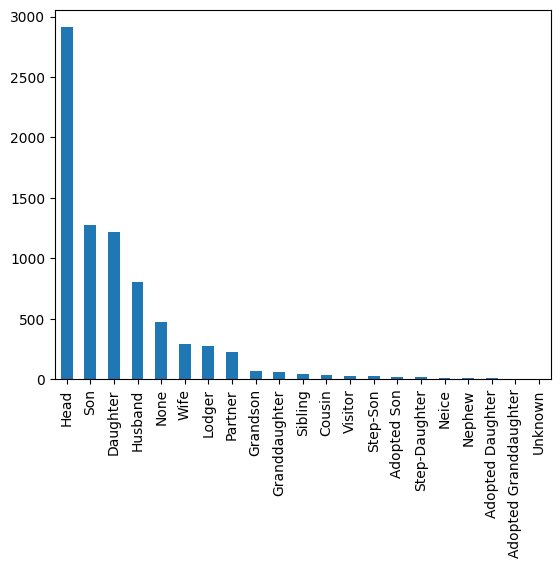

In [41]:
p_census['Relationship to Head of House'].value_counts().plot(kind='bar')

#### One missing value was present in the Relationship to Head of House column and it was replaced with 'Unknown'

### HANDLING MARITAL STATUS

In [42]:
mar_status ={"D" : "Divorced", "W" : "Widowed", "M" : "Married" ,"S" : "Single"}
p_census["Marital Status"].replace(mar_status, inplace = True)

In [43]:
# sanity check on gender
p_census["Marital Status"].value_counts()

Single      2661
Married     2196
Divorced     702
Widowed      400
               1
Name: Marital Status, dtype: int64

In [44]:
p_census[p_census['Marital Status'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
819,31,Newfound Drive,Hilary,Morgan,22,Daughter,,Female,University Student,None,None


In [45]:
p_census['Marital Status'].mode()

0    Single
Name: Marital Status, dtype: object

In [46]:
p_census['Marital Status'].replace(' ', 'Single', inplace = True)

In [47]:
p_census['Marital Status'].unique()

array(['Married', nan, 'Divorced', 'Widowed', 'Single'], dtype=object)

In [48]:
# sanity check on gender
p_census["Marital Status"].value_counts()

Single      2662
Married     2196
Divorced     702
Widowed      400
Name: Marital Status, dtype: int64

#### Initials like D, M, S, W was replaced with their full meanings - Divorced, Married, Single, Widowed respectively in marital status and there was one missing value, which was replaced by unknown


In [49]:
p_census[(p_census["Marital Status"].isnull()) & (p_census["Age"] < 18)]#check records with null marital status and age up to 18

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,1,Forgotten Gardens,Nicole,White,15,Daughter,NaN,Female,Student,None,NaN
4,2,Forgotten Gardens,Jeffrey,John,9,Son,NaN,Male,Student,None,NaN
7,4,Forgotten Gardens,Gerard,Mills,5,Son,NaN,Male,Student,None,NaN
8,4,Forgotten Gardens,Anna,Mills,5,Daughter,NaN,Female,Student,None,NaN
9,4,Forgotten Gardens,Leslie,Jones,3,Son,NaN,Male,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7747,1,Matthews Rectory,Hollie,Martin,3,Daughter,NaN,Female,Child,None,NaN
7748,1,Matthews Rectory,Patrick,Martin,0,Son,NaN,Male,Child,None,NaN
7766,1,Adams Cottage,Tracey,Singh,8,Daughter,NaN,Female,Student,None,NaN
7767,1,Adams Cottage,Abdul,Singh,8,Son,NaN,Male,Student,None,NaN


In [50]:
# replace the missing values in marital status with under age
p_census["Marital Status"].replace(np.nan, "under_age", inplace = True)

In [51]:
p_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7773 entries, 0 to 7772
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7773 non-null   int64 
 1   Street                         7773 non-null   object
 2   First Name                     7773 non-null   object
 3   Surname                        7773 non-null   object
 4   Age                            7773 non-null   int64 
 5   Relationship to Head of House  7773 non-null   object
 6   Marital Status                 7773 non-null   object
 7   Gender                         7773 non-null   object
 8   Occupation                     7773 non-null   object
 9   Infirmity                      7773 non-null   object
 10  Religion                       5910 non-null   object
dtypes: int64(2), object(9)
memory usage: 668.1+ KB


<AxesSubplot: >

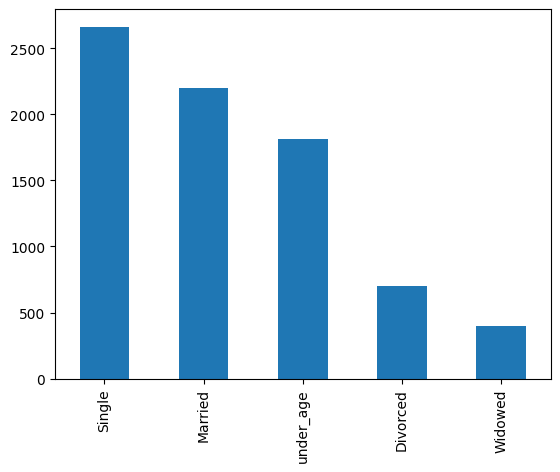

In [52]:
p_census['Marital Status'].value_counts().plot(kind='bar')

#### Initials like D, M, S, W was replaced with their full meanings - Divorced, Married, Single, Widowed respectively in marital status and there was one missing value, which was replaced by unknown. Also children under 18 years was classified as under age because they have not reached the legal age to marry 


In [53]:
p_census.loc[(p_census['Marital Status']== 'Married') & (p_census['Age'] < 18 )]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2033,6,Chester Street,Anne,Thomson,16,Head,Married,Female,Student,None,NaN


In [54]:
p_census.loc[(p_census['Marital Status']== 'Divorced') & (p_census['Age'] > 18 )]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3,2,Forgotten Gardens,Michelle,John,44,Head,Divorced,Female,"Administrator, arts",None,Christian
6,4,Forgotten Gardens,Harry,Mills,38,Head,Divorced,Male,Technical brewer,None,Catholic
13,6,Forgotten Gardens,Samantha,Lewis,73,Head,Divorced,Female,Retired Brewing technologist,None,Christian
15,6,Forgotten Gardens,Charles,Lewis,41,Son,Divorced,Male,"Surveyor, minerals",None,None
21,8,Forgotten Gardens,Catherine,Cox,38,Head,Divorced,Female,Unemployed,None,None
...,...,...,...,...,...,...,...,...,...,...,...
7723,1,Dixon Longhouse,Vanessa,Parkinson,39,Head,Divorced,Female,"Doctor, hospital",None,Christian
7734,1,Brown Obervatory,Naomi,Porter,23,Lodger,Divorced,Female,Travel agency manager,None,Catholic
7746,1,Matthews Rectory,Marian,Martin,42,Head,Divorced,Female,Oceanographer,None,Christian
7768,1,Fletcher Farmhouse,Beverley,Hudson,30,Head,Divorced,Female,"Research officer, trade union",None,Christian


In [55]:
p_census.loc[(p_census['Relationship to Head of House']== 'Head') & (p_census['Age'] < 18 )]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2033,6,Chester Street,Anne,Thomson,16,Head,Married,Female,Student,None,NaN
5607,1,Kielder Avenue,Joanna,Webb,16,Head,Single,Female,Unemployed,None,NaN


## HANDLING GENDER

In [56]:
sex ={"female" : "Female" , "f" : "Female", "F" : "Female", "male" : "Male", "M" : "Male", "m" : "Male"}
p_census["Gender"].replace(sex, inplace = True)

In [57]:
# sanity check on gender
p_census["Gender"].value_counts()

Female    4016
Male      3756
             1
Name: Gender, dtype: int64

In [58]:
#confirming Gender with Relationship to head of house so as to be sure of gender for the missing cell
p_census[p_census['Gender'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5394,13,Simpson Flats,Antony,Welch-Martin,61,Husband,Married,,"Psychologist, prison and probation services",None,Catholic


In [59]:
p_census['Gender'].replace(' ', 'Male', inplace = True)

In [60]:
# sanity check on gender
p_census["Gender"].value_counts()

Female    4016
Male      3757
Name: Gender, dtype: int64

In [61]:
p_census['Gender'].unique()

array(['Female', 'Male'], dtype=object)

###  In the gender column, all others not Male or Female but corresponding to either of the two was replaced with their intended equivalent.

### The only missing value was male since , the name and relationship to head of house is a masculine gender

### HANDLING OCCUPATION

In [62]:
p_census["Occupation"]

0                                     Unemployed
1                   Education officer, community
2                                        Student
3                            Administrator, arts
4                                        Student
                          ...                   
7768               Research officer, trade union
7769                                       Child
7770        Accountant, chartered public finance
7771                                  Unemployed
7772    Geographical information systems officer
Name: Occupation, Length: 7773, dtype: object

In [63]:
p_census["Occupation"].value_counts().sort_values()#sorting by number of people in occupations.

Retired Consulting civil engineer         1
Retired Dramatherapist                    1
Retired Conservator, museum/gallery       1
Retired Media buyer                       1
Retired Building services engineer        1
                                       ... 
PhD Student                              14
Child                                   433
Unemployed                              481
University Student                      488
Student                                1477
Name: Occupation, Length: 1086, dtype: int64

In [64]:
def repl_ret(col):
    if col.startswith("Retired"):
        retired = col.split()[0]
        return retired
    else:
        return col

In [65]:
p_census["Occupation"] = p_census["Occupation"].apply(repl_ret)   # do not create a new column

#### HANDLING INFIRMITY

In [66]:
p_census['Infirmity'].value_counts()

None                   7721
Unknown Infection        10
Blind                    10
Physical Disability       8
Disabled                  7
                          6
Mental Disability         6
Deaf                      5
Name: Infirmity, dtype: int64

In [67]:
def repair_infirmity(column: list):
    for i, row in enumerate(column):
        if row == ' ':
            column[i] = 'Unknown'
    return column

p_census['Infirmity'] = repair_infirmity(p_census['Infirmity'].tolist())

In [68]:
p_census['Infirmity'].value_counts()

None                   7721
Unknown Infection        10
Blind                    10
Physical Disability       8
Disabled                  7
Unknown                   6
Mental Disability         6
Deaf                      5
Name: Infirmity, dtype: int64

#### There were 6 missing values in the infirmity columns and it was  filled with 'Unknown'

#### TREATING RELIGION

<AxesSubplot: >

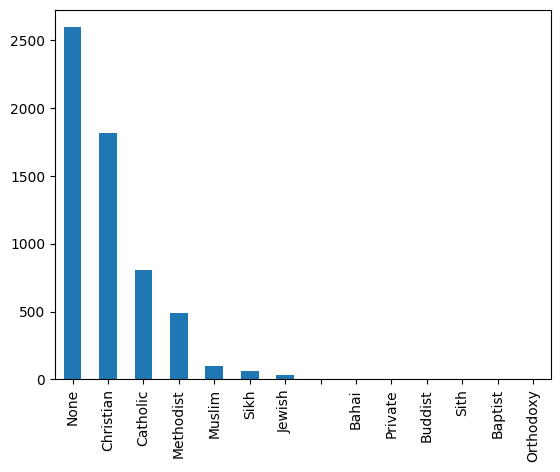

In [69]:
p_census['Religion'].value_counts().plot(kind='bar')

In [70]:
p_census['Religion'].unique()

array(['Christian', nan, 'None', 'Catholic', 'Methodist', 'Muslim',
       'Jewish', 'Sikh', 'Buddist', 'Bahai', 'Sith', 'Private', 'Baptist',
       ' ', 'Orthodoxy'], dtype=object)

In [71]:
p_census['Religion'] = p_census['Religion'].replace(np.nan,'None')
p_census['Religion'] = p_census['Religion'].replace(' ','None')
p_census['Religion'] = p_census['Religion'].replace('Private','None')
p_census['Religion'] = p_census['Religion'].replace('Methodist','Christian')
p_census['Religion'] = p_census['Religion'].replace('Baptist','Christian')
p_census['Religion'] = p_census['Religion'].replace('Private','None')
p_census['Religion'] = p_census['Religion'].replace('Bahai','Others')
p_census['Religion'] = p_census['Religion'].replace('Sith','Others')
p_census['Religion'] = p_census['Religion'].replace('Orthodoxy','Others')
p_census['Religion'] = p_census['Religion'].replace('Buddist','Others')


In [72]:
p_census['Religion'].unique()

array(['Christian', 'None', 'Catholic', 'Muslim', 'Jewish', 'Sikh',
       'Others'], dtype=object)

<AxesSubplot: >

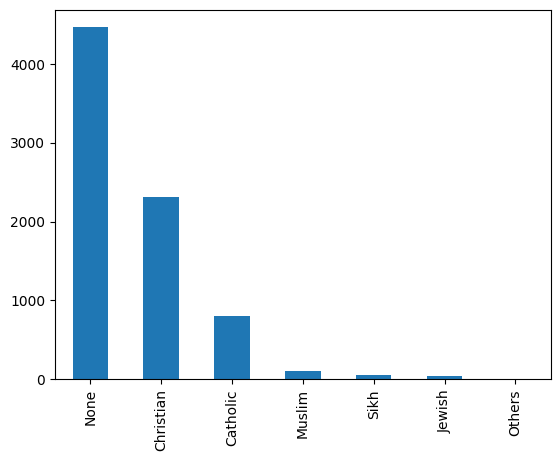

In [73]:
p_census['Religion'].value_counts().plot(kind='bar')

In [74]:
p_census[p_census['Occupation'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
949,16,Newfound Creek,Danielle,Wood,70,Head,Single,Female,,None,Christian


In [75]:
p_census['Occupation'].replace(' ', 'Retired', inplace = True)

In [76]:
p_census[949 : 950]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
949,16,Newfound Creek,Danielle,Wood,70,Head,Single,Female,Retired,None,Christian


#### Private was added to none because, there's no religion called by private. And the missing value was replaced by none too 

In [77]:
p_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7773 entries, 0 to 7772
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7773 non-null   int64 
 1   Street                         7773 non-null   object
 2   First Name                     7773 non-null   object
 3   Surname                        7773 non-null   object
 4   Age                            7773 non-null   int64 
 5   Relationship to Head of House  7773 non-null   object
 6   Marital Status                 7773 non-null   object
 7   Gender                         7773 non-null   object
 8   Occupation                     7773 non-null   object
 9   Infirmity                      7773 non-null   object
 10  Religion                       7773 non-null   object
dtypes: int64(2), object(9)
memory usage: 668.1+ KB


### VISUALIZATION

In [78]:
p_census.dtypes

House Number                      int64
Street                           object
First Name                       object
Surname                          object
Age                               int64
Relationship to Head of House    object
Marital Status                   object
Gender                           object
Occupation                       object
Infirmity                        object
Religion                         object
dtype: object

## Visualizing Age and Age Pyramid

## Age

In [79]:
p_census["Age"].describe()

count    7773.000000
mean       36.501737
std        21.836910
min         0.000000
25%        19.000000
50%        36.000000
75%        52.000000
max       105.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Distribution of Age in the data Set')

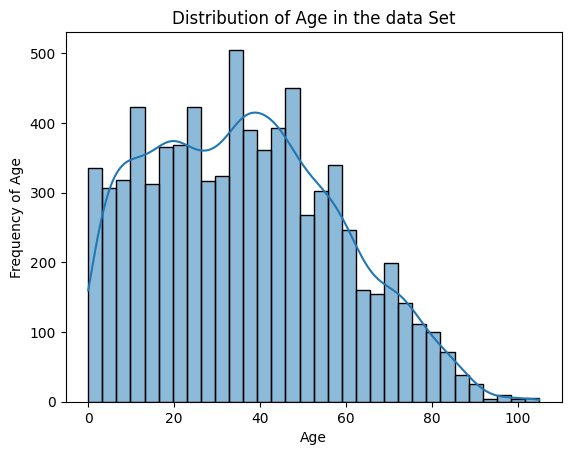

In [80]:

sns.histplot(p_census['Age'], kde=True)
plt.ylabel("Frequency of Age")
plt.title("Distribution of Age in the data Set")

# MARITAL STATUS

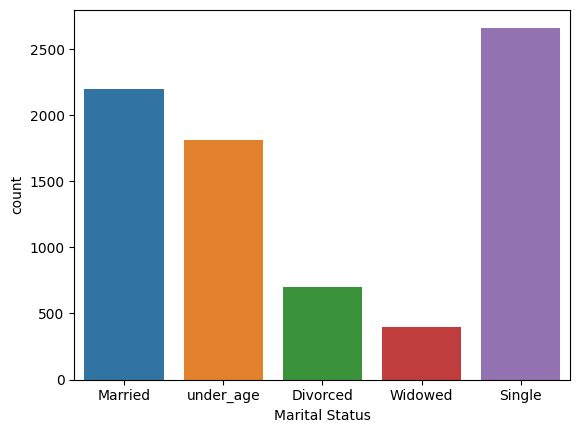

In [81]:
sns.countplot(data = p_census, x = "Marital Status");

# AGE

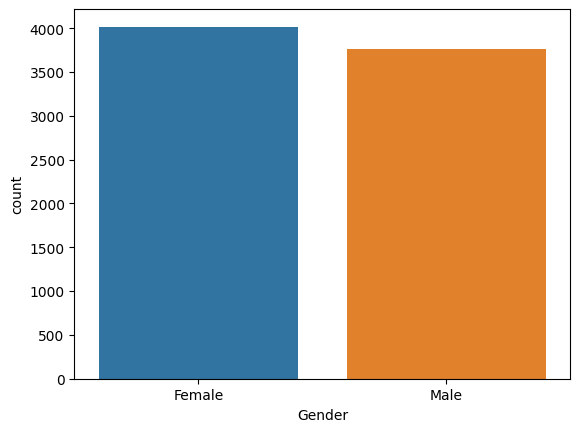

In [82]:
sns.countplot(data = p_census , x = "Gender");

# RELIGION

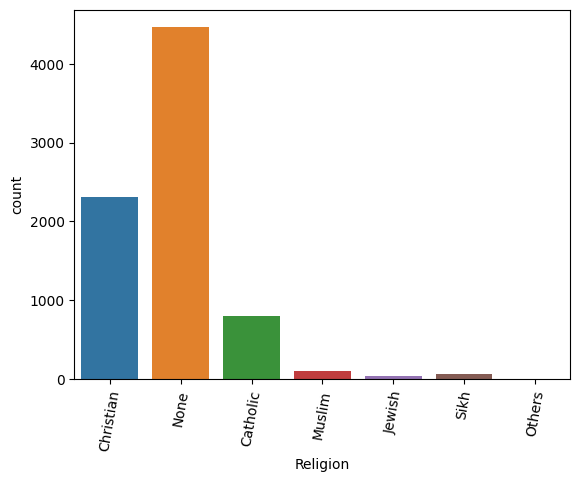

In [83]:
sns.countplot(data = p_census, x = "Religion")
plt.xticks(rotation = 80);

# RELATIONSHIP among AGE,RELIGION AND GENDER

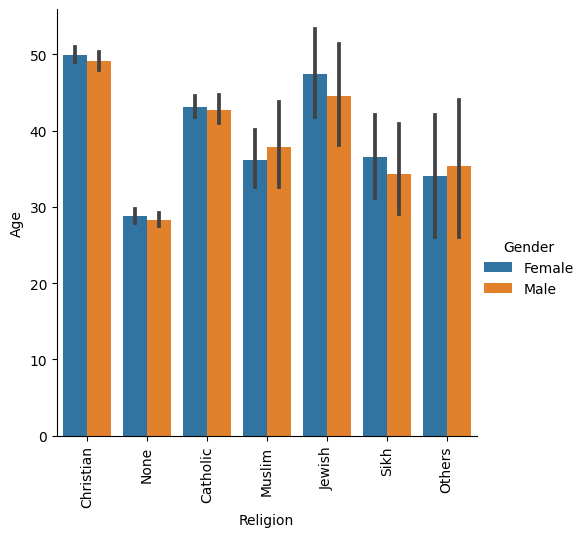

In [84]:
sns.catplot(data = p_census , x = "Religion" , y = "Age" , hue = "Gender",kind ="bar")
plt.xticks(rotation = 90);

# RELATIONSHIP AMONG MARITAL STATUS,AGE AND GENDER

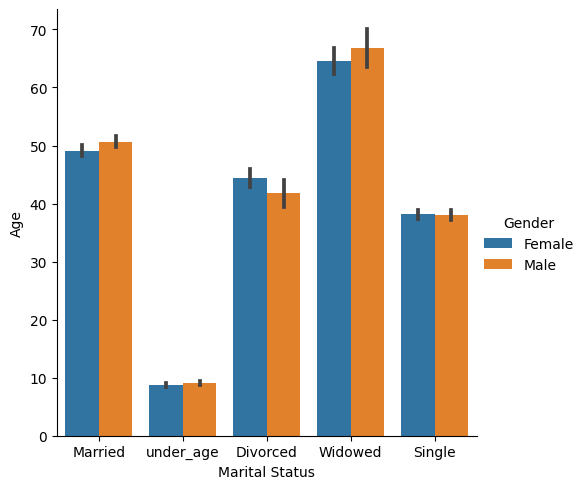

In [85]:
sns.catplot(data = p_census, x = "Marital Status", y = "Age" ,kind = "bar", hue = "Gender");

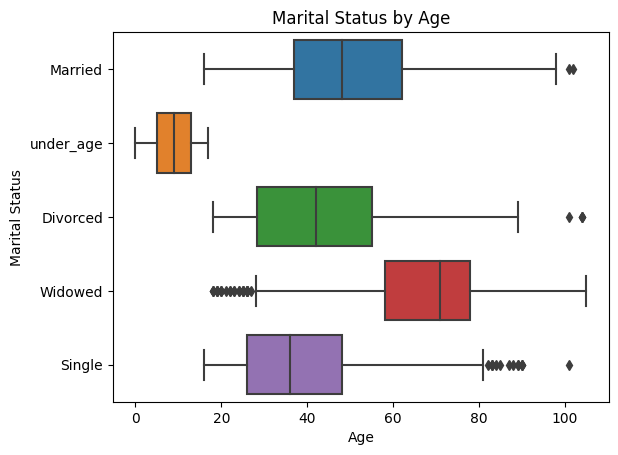

In [86]:
sns.boxplot(x = 'Age',   y = 'Marital Status',data = p_census)
plt.title('Marital Status by Age')
plt.show()

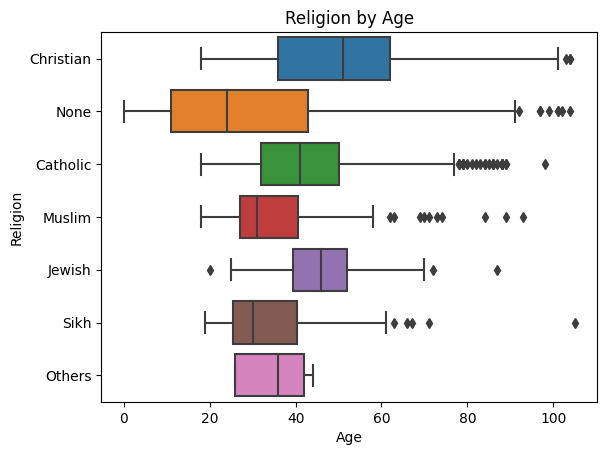

In [87]:
sns.boxplot(x = 'Age',   y = 'Religion',data = p_census)
plt.title('Religion by Age')
plt.show()


In [88]:
p_census["Marital Status"].describe()

count       7773
unique         5
top       Single
freq        2662
Name: Marital Status, dtype: object

In [89]:
p_census["Religion"].describe()

count     7773
unique       7
top       None
freq      4462
Name: Religion, dtype: object

### Age Pyramid

In [90]:
#calculating age pyramid we have the below
Age_group = [ ((i-1)*5 ,  (i-1)*5 + 4)  for i in range(1,21)] + [(100, 110)]
print (Age_group)




[(0, 4), (5, 9), (10, 14), (15, 19), (20, 24), (25, 29), (30, 34), (35, 39), (40, 44), (45, 49), (50, 54), (55, 59), (60, 64), (65, 69), (70, 74), (75, 79), (80, 84), (85, 89), (90, 94), (95, 99), (100, 110)]


In [91]:
Count_males = []
Count_females = []
for pp in Age_group:
    pA = p_census[p_census['Age'] <= pp[1]] 
    pB = pA[pA['Age'] >= pp[0] ]
    Count_males.append(len(pB[pB['Gender'] == 'Male']))
    Count_females.append(len(pB[pB['Gender'] == 'Female']))


Count_males = [(-1)*x for x in Count_males]
print (Count_males)
print (Count_females)

[-235, -262, -302, -286, -278, -264, -262, -285, -295, -252, -227, -215, -181, -108, -109, -86, -56, -38, -7, -5, -4]
[198, 265, 233, 280, 279, 287, 291, 381, 333, 323, 251, 217, 175, 146, 144, 96, 67, 35, 5, 5, 5]


Text(0.5, 1.0, 'Census Data Population Pyramid')

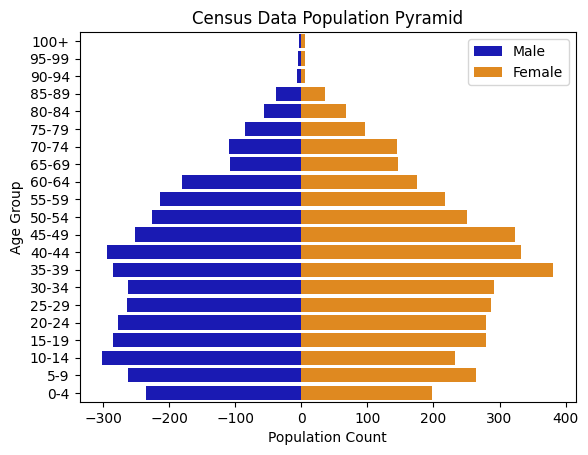

In [92]:
class_age= ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100+']

class_age.reverse()
Count_males.reverse()
Count_females.reverse()

p_age = pd.DataFrame({'Age': class_age,
 'Male': Count_males,
 'Female': Count_females})



age_pyramid = sns.barplot(x='Male', y='Age', data=p_age, order=class_age,
color=('mediumblue'), label='Male')
age_pyramid = sns.barplot(x='Female', y='Age', data=p_age, order=class_age,
color=('darkorange'), label='Female')
age_pyramid.legend()
age_pyramid.set(xlabel='Population Count', ylabel='Age Group')
plt.title('Census Data Population Pyramid')


In [93]:
#this gave us the total number of male and female
print(len(p_census[p_census['Gender'] == 'Female']))
print(len(p_census[p_census['Gender'] == 'Male']))

4016
3757


##### COMMUTERS

In [94]:
University_student = p_census[p_census['Occupation'] == 'University Student'] 
print ('Number of University Students:',len(University_student))

phD_Student = p_census[p_census['Occupation'] == 'PhD Student']
print ('Number of PhD Students:',len(phD_Student))


student = p_census[p_census['Occupation'] == 'Student']
print ('Number of Students:',len(student))

Number of University Students: 488
Number of PhD Students: 14
Number of Students: 1477


In [95]:
#working onOccupations
split_Occupation = p_census['Occupation'].str.split()
p_census['OccupationFW'] = split_Occupation.str[0]
p_census

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,OccupationFW
0,1,Forgotten Gardens,Laura,White,56,Head,Married,Female,Unemployed,None,Christian,Unemployed
1,1,Forgotten Gardens,Elliot,White,57,Husband,Married,Male,"Education officer, community",None,Christian,Education
2,1,Forgotten Gardens,Nicole,White,15,Daughter,under_age,Female,Student,None,None,Student
3,2,Forgotten Gardens,Michelle,John,44,Head,Divorced,Female,"Administrator, arts",None,Christian,"Administrator,"
4,2,Forgotten Gardens,Jeffrey,John,9,Son,under_age,Male,Student,None,None,Student
...,...,...,...,...,...,...,...,...,...,...,...,...
7768,1,Fletcher Farmhouse,Beverley,Hudson,30,Head,Divorced,Female,"Research officer, trade union",None,Christian,Research
7769,1,Fletcher Farmhouse,Rachael,Hudson,0,Daughter,under_age,Female,Child,None,None,Child
7770,1,Fletcher Farmhouse,Stephen,Shepherd,54,Sibling,Divorced,Male,"Accountant, chartered public finance",None,None,"Accountant,"
7771,1,Fletcher Farmhouse,William,French,48,Lodger,Single,Male,Unemployed,None,Christian,Unemployed


In [126]:
not_retired = p_census[p_census['OccupationFW'] != 'Retired']


In [97]:
Unemployed = (not_retired['Occupation'] != 'Student') & (not_retired['Occupation'] != 'PhD Student') & (not_retired['Occupation'] != 'University Student') & (not_retired['Occupation'] != 'Unemployed')
p_Unemployed = not_retired[Unemployed]

In [98]:
commuter_Wife=len(p_census[p_census['Relationship to Head of House'] == 'Wife'])
commuter_Husband=len(p_census[p_census['Relationship to Head of House'] == 'Husband'])
commuter_huband_wife= commuter_Husband-commuter_Wife
commuter_huband_wife

512

In [99]:
future_uni_student =(p_census['Occupation']=='Student') & (p_census['Age'] >= 12)
len(p_census[future_uni_student])

731

In [127]:
#expected student to be in the university  in the next 5 years
len(University_student) 

488

In [101]:
Unemployed_Rand = p_Unemployed.sample(100)

In [102]:
Unemployed_Rand['Occupation'].unique()

array(['Lawyer', 'Energy manager', 'Clinical embryologist',
       'Cartographer', 'Lobbyist',
       'Senior tax professional/tax inspector', 'Child', 'Risk manager',
       'Animal technologist', 'Designer, industrial/product',
       'Engineer, materials', 'Designer, fashion/clothing',
       'Building services engineer', 'Planning and development surveyor',
       'Geoscientist', 'Recruitment consultant', 'Public librarian',
       'Land/geomatics surveyor', 'Homeopath', 'Technical brewer',
       'Data processing manager', 'Occupational therapist', 'Hydrologist',
       'Furniture conservator/restorer', 'Optician, dispensing',
       'Scientist, research (maths)', 'Physicist, medical',
       'Scientist, forensic', 'Civil Service fast streamer', 'Dentist',
       'Firefighter', 'Outdoor activities/education manager',
       'Minerals surveyor', 'Orthoptist', 'Accounting technician',
       'International aid/development worker', 'Engineer, communications',
       'Air cabin crew',

###### BIRTH RATE

### Birth Rate per 1000 .
### The birth rate was calculated by dividing the number of children born in the year by the total population and multiplying the result by 1000

In [103]:
# finding the birthrate
children_Age_0 = len(p_census[p_census['Age'] == 0])
female_age_25to29 = len (p_census[ (p_census['Age'].between(25,29)) & (p_census['Gender'] == 'Female') ] )

children_Age_4 = len(p_census[p_census['Age'] == 4])
female_age_30to34 = len (p_census[ (p_census['Age'].between(30,34)) & (p_census['Gender'] == 'Female') ] )

print ('number of children aged zero:', children_Age_0)
print ('number of children aged four:', children_Age_4)
print ('number of women aged 25-29:',female_age_25to29)
print ('number of women aged 30-34:', female_age_30to34)

number of children aged zero: 59
number of children aged four: 98
number of women aged 25-29: 287
number of women aged 30-34: 291


In [104]:
#formula for  Birth-rate
# crude birth rate
birth_rate =children_Age_0 /len(p_census) * 1000
print (birth_rate)

7.590376945838158


In [105]:
# last Crude Birth-rate
children_Age_4/len(p_census) * 1000

12.60774475749389

#### The crude birthrate reduced by about 5 children per 1000 in a five-year period.

In [107]:
# age-specific birth rate for 25-29 year old women
#Present Birth rate per 1000
children_Age_0/female_age_25to29 * 1000

205.57491289198606

In [108]:
#age-specific birth rate for 30-34 year old women
#Previous Birth per 1000
children_Age_4/female_age_30to34  * 1000

336.7697594501718

##### The Age-specific birthrate dropped by about 131 children per 1000 in a five-year period.

In [110]:
#death rate
age_56to60_Count = len(p_census[p_census['Age'].between(56,60)])
age_61to65_Count = len(p_census[p_census['Age'].between(61,65)])
print ('The num of people in the age group 56-60:',age_56to60_Count)
print ('The num of people in the age group 61-65:',age_61to65_Count)

#death rate per annum
death_Rate_Per_year = (age_56to60_Count - age_61to65_Count)/5
print ('death rate per annum:',death_Rate_Per_year)

The num of people in the age group 56-60: 432
The num of people in the age group 61-65: 315
death rate per annum: 23.4


In [111]:
age_group = ['66-70 & 71-75', '76-80 & 81-85', '86-90 & 91-95', '96-100 & 101-105']
r1 = [(66,70), (76,80), (86,90) ,(96,100)]
r2 =  [(71,75), (81,85), (91,95) ,(101,105)]
age_Count_r1 = [len(p_census[p_census['Age'].between(x[0],x[1])]) for x in r1]
age_Count_r2 = [len(p_census[p_census['Age'].between(x[0],x[1])]) for x in r2]
print (age_Count_r1)
print (age_Count_r2)

death_rate_per_annum = pd.DataFrame({'Age-Range':age_group,
 'Num_range_1': age_Count_r1,
 'Num_range_2': age_Count_r2})
death_rate_per_annum

[255, 169, 61, 10]
[240, 114, 7, 9]


,Age-Range,Num_range_1,Num_range_2
0,66-70 & 71-75,255,240
1,76-80 & 81-85,169,114
2,86-90 & 91-95,61,7
3,96-100 & 101-105,10,9


In [112]:
death_rate_per_annum['Number of Death'] = death_rate_per_annum['Num_range_1'] - death_rate_per_annum['Num_range_2']
death_rate_per_annum['Death rate per annum'] = death_rate_per_annum['Number of Death']/5
death_rate_per_annum

,Age-Range,Num_range_1,Num_range_2,Number of Death,Death rate per annum
0,66-70 & 71-75,255,240,15,3.0
1,76-80 & 81-85,169,114,55,11.0
2,86-90 & 91-95,61,7,54,10.8
3,96-100 & 101-105,10,9,1,0.2


In [113]:
death_rate = death_rate_per_annum['Number of Death'].sum()/len(p_census) * 1000
death_rate

16.081307088640163

In [125]:
#Immigrants
visitor_in_town = p_census[(p_census['Relationship to Head of House'] == 'Visitor')]
print (len(visitor_in_town))

lodgers_in_town = p_census[(p_census['Relationship to Head of House'] == 'Lodger')]
print (len(lodgers_in_town))

immigration_Rate =  (len(visitor_in_town) + len(lodgers_in_town))/len(p_census) * 1000
print(immigration_Rate )

27
274
38.72378746944552


### DIVORCES

In [115]:

female_divorces = len(p_census[(p_census['Marital Status'] == 'Divorced') & (p_census['Gender'] == 'Female')])
print (female_divorces)

male_divorces = len(p_census[(p_census['Marital Status'] == 'Divorced') & (p_census['Gender'] == 'Male')])
print (male_divorces)

emmigration_rate = ( female_divorces - male_divorces)/len(p_census) * 1000
print(emmigration_rate)

443
259
23.67168403447832


#### POPULATION GROWTH

In [116]:

((birth_rate + immigration_Rate) - (death_rate + emmigration_rate))

6.5611732921651935

In [117]:
unempployed_pop = p_census[ p_census['Occupation'] == 'Unemployed']
#people above 65 are assumed to be retired
unempployed_pop = unempployed_pop[unempployed_pop['Age'] < 65]


In [118]:
unempployed_pop

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,OccupationFW
0,1,Forgotten Gardens,Laura,White,56,Head,Married,Female,Unemployed,None,Christian,Unemployed
11,5,Forgotten Gardens,Rhys,Conway,41,Husband,Married,Male,Unemployed,None,None,Unemployed
21,8,Forgotten Gardens,Catherine,Cox,38,Head,Divorced,Female,Unemployed,None,None,Unemployed
24,9,Forgotten Gardens,Hollie,Robinson,30,Head,Divorced,Female,Unemployed,None,Catholic,Unemployed
61,13,Quayside Drive,Mohamed,Stevens,57,Head,Single,Male,Unemployed,None,Christian,Unemployed
...,...,...,...,...,...,...,...,...,...,...,...,...
7636,11,North Glens,Frank,Rowe,29,Partner,Single,Male,Unemployed,None,Christian,Unemployed
7638,12,North Glens,Elliott,Bibi,48,Head,Single,Male,Unemployed,None,Catholic,Unemployed
7645,14,North Glens,Eleanor,Clark,31,Daughter,Single,Female,Unemployed,None,Christian,Unemployed
7686,25,North Glens,Elaine,Mitchell,23,Daughter,Single,Female,Unemployed,None,Catholic,Unemployed


In [119]:
p_census['Street'].unique()

array(['Forgotten Gardens', 'Quayside Drive', 'Fish Harbor',
       'Matthews River', 'Butcher Burgs', 'Oaktree Road', 'Thomas Brook',
       'Newfound Drive', 'Wade Manors', 'Newfound Creek',
       'Aprildraw Avenue', 'Beechpush Lane', 'Pillar Avenue',
       'Springban Street', 'Donnelly Cliffs', 'Pratt Via',
       'Higgins Burgs', 'Murray Road', 'Kraken Road', 'Guardian Mews',
       'Webster Street', 'Nicholson Road', 'Repton Lane',
       'Barbican Prairie', 'Wakefieldthorpe Street', 'Chester Street',
       'Sinclair Passage', 'Palmtree Haven', 'Stirling Avenue',
       'Iron Track', 'Norwich Cliffs', 'Portsmouthcurl Road',
       'Forgottencrib Lane', 'Joyce Mill', 'Briggs Avenue',
       'Aquarius Lane', 'Chapman Landing', 'Wong Light',
       'Robinson Bridge', 'Estuary Drive', 'Khan Valley',
       'Wolverhampton Avenue', 'March Views', 'Lucas Groves',
       'Gold Street', 'Copper Loaf', 'Metropolis Alley',
       'Jenkins Extensions', 'Palmer Track', 'Laurel Road',
      

In [122]:
st = p_census['Street'].unique().tolist()
numberStreet = len(st)
print (' ')
mode= []  # the frequent house num in a street
for x in st:
    temp = (p_census[p_census['Street'] == x ])
    Mode_House = ((temp['House Number']).mode())[0]
    mode.append( len(temp[temp['House Number'] == Mode_House]) )
#prining the Mode List    
print (' ')
NumberHouseStreet = [len((p_census[p_census['Street'] == st[x]])['House Number'].unique()) for x in range(0,numberStreet)] #Num of houses in each street
#print number of house street 
print (' ')
#Repetiting the Street name
street_Rep = [st[i] for i in range(0,numberStreet) for j in range(0,NumberHouseStreet[i])]
print (' ')
houseNum = []
for x in st:
    houseNum.append((p_census[p_census['Street'] == x])['House Number'].unique().tolist())
Dist_Hou_Num = [x for sublist in houseNum for x in sublist]
houseNum = []
for x in st:
    houseNum.append((p_census[p_census['Street'] == x])['House Number'].unique().tolist())
Dist_Hou_Num = [x for sublist in houseNum for x in sublist]
print (' ') 
Mode = [mode[i] for i in range(0,numberStreet) for j in range(0,NumberHouseStreet[i])]
print (' ')
Occupancy = [len(p_census[ (p_census['Street'] == street_Rep[i]) & (p_census['House Number'] == Dist_Hou_Num[i])]) for i in range(0,len( street_Rep)) ]
housing_demand = pd.DataFrame({'Street': street_Rep, 'House Number': Dist_Hou_Num, 'Mode': Mode,'Occupancy': Occupancy})

housing_demand['Difference'] = housing_demand['Mode'] - housing_demand['Occupancy']
housing_demand

,Street,House Number,Mode,Occupancy,Difference
0,Forgotten Gardens,1,5,3,2
1,Forgotten Gardens,2,5,2,3
2,Forgotten Gardens,3,5,1,4
3,Forgotten Gardens,4,5,4,1
4,Forgotten Gardens,5,5,3,2
...,...,...,...,...,...
2907,Temple Rectory,1,5,5,0
2908,Lee Villa,1,1,1,0
2909,Elephant Folly,1,5,5,0
2910,Adams Cottage,1,3,3,0


In [123]:
p_census.describe()

,House Number,Age
count,7773.000000,7773.000000
mean,30.491316,36.501737
std,36.500214,21.836910
min,1.000000,0.000000
25%,9.000000,19.000000
50%,20.000000,36.000000
75%,36.000000,52.000000
max,221.000000,105.000000


In [124]:
rep = sv.analyze(p_census)
rep.show_html()


C:\Users\kelvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\kelvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |                                             | [  0%]   00:00 ->…

C:\Users\kelvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\kelvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Users\kelvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Users\kelvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWa

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
